In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/fake news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


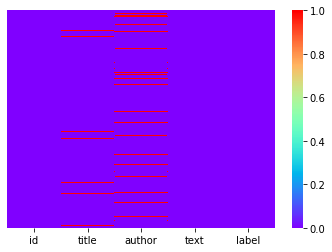

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [ ]:
df=df.dropna()

In [ ]:
X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
X.shape

(18285, 4)

In [ ]:
Y=df.iloc[:,-1:]
Y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import LSTM 
from keras.layers import Dense

In [ ]:
voc_size=5000

In [ ]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.5.
The scikit-learn version is 1.0.2.


In [ ]:
msg=X.copy()

In [ ]:
msg.reset_index(inplace=True)

In [ ]:
X.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [ ]:
import re 
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Data preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
# eg: preprocess is stem word of preprocessing

In [ ]:
ps=PorterStemmer()

In [ ]:
corpus=[]
for i in range(0,len(msg)):
  x=re.sub(' [^a-zA-Z] ','  ',msg['title'][i])
  x=x.lower()
  x=x.split()
  x=[ps.stem(word) for word in x if not word in stopwords.words('english')]
  x=' '.join(x)
  corpus.append(x)

In [ ]:
corpus[1]

'flynn: hillari clinton, big woman campu breitbart'

One Hot Encoding

In [ ]:
encoding=[one_hot(words,voc_size) for words in corpus]
encoding 

[[4265, 911, 3222, 2822, 1700, 3517, 882, 1315, 4323, 3371, 3752],
 [4448, 2553, 4538, 1464, 4472, 1929, 4349],
 [165, 4290, 2838, 3387],
 [2154, 567, 364, 4523, 3563, 4433, 1336],
 [648, 4472, 4828, 2820, 4823, 370, 4472, 2572, 4563, 4123],
 [1417,
  3544,
  3663,
  1045,
  3338,
  4382,
  39,
  1796,
  1999,
  3477,
  4445,
  73,
  4837,
  4393,
  4349],
 [2545, 2811, 4649, 299, 4636, 278, 4835, 2886, 2657, 2274, 751],
 [1172, 4638, 830, 2326, 2049, 4854, 4382, 4819, 2657, 2274, 751],
 [176, 1742, 3965, 4312, 372, 702, 3684, 802, 4836, 2523],
 [2694, 4297, 116, 4925, 432, 1199, 3197, 1541],
 [2603, 4400, 1179, 3288, 2959, 1130, 994, 1458, 1676, 2505, 483],
 [3563, 3383, 3517, 702, 4382, 2049],
 [2308, 4664, 3560, 2111, 4361, 2617, 2367, 314, 2338, 1042],
 [2837, 1534, 1150, 126, 1225, 1929, 1484, 2657, 2274, 751],
 [4557, 2787, 4995, 4148, 3310, 2657, 2274, 751],
 [1115, 1073, 3254, 3972, 619, 4428, 1658, 4199, 4173, 2876, 1658, 4081],
 [4035, 3336, 1225],
 [1407, 1982, 4775, 2763, 4

In [ ]:
lenght=20
emb=pad_sequences(encoding,padding='pre',maxlen=lenght)
print(emb)

[[   0    0    0 ... 4323 3371 3752]
 [   0    0    0 ... 4472 1929 4349]
 [   0    0    0 ... 4290 2838 3387]
 ...
 [   0    0    0 ... 2657 2274  751]
 [   0    0    0 ... 1130 2625 2112]
 [   0    0    0 ... 4367 3289 2747]]


In [ ]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size,emb_feature,input_length=lenght))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape,Y_result.shape)

(18285, 20) (18285, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_result,Y_result,test_size=0.33,random_state=42)

#Train

In [ ]:
  model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=125,batch_size=32, initial_epoch=60)

Epoch 61/125
383/383 [==============================] - 11s 8ms/step - loss: 0.2824 - accuracy: 0.8728 - val_loss: 0.1906 - val_accuracy: 0.9188
Epoch 62/125
383/383 [==============================] - 3s 7ms/step - loss: 0.1251 - accuracy: 0.9538 - val_loss: 0.2059 - val_accuracy: 0.9183
Epoch 63/125
383/383 [==============================] - 4s 10ms/step - loss: 0.0825 - accuracy: 0.9695 - val_loss: 0.2392 - val_accuracy: 0.9017
Epoch 64/125
383/383 [==============================] - 4s 12ms/step - loss: 0.0531 - accuracy: 0.9823 - val_loss: 0.2741 - val_accuracy: 0.9057
Epoch 65/125
383/383 [==============================] - 4s 11ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.3390 - val_accuracy: 0.9047
Epoch 66/125
383/383 [==============================] - 4s 11ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.3839 - val_accuracy: 0.9044
Epoch 67/125
383/383 [==============================] - 3s 7ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.4999 - val_accu

In [ ]:
from keras.layers import Dropout

In [ ]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size,emb_feature,input_length=lenght))
model.add(LSTM(100))
model.add(Dropout(0.30))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape,Y_result.shape)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_result,Y_result,test_size=0.33,random_state=42)

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=125,batch_size=32)